In [96]:
#Importing Libraries 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

# Data Import

In [2]:
data = pd.read_csv("C:/Users/Lenovo/Desktop/Technocolabs/Projects/WA_Fn-UseC_-HR-Employee-Attrition.csv")
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
#Data dimension
data.shape

(1470, 35)

# Data Preprocessing & Cleaning

In [7]:
#Data Info
data.info()     

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [18]:
#Duplicate in data
duplicates = data.duplicated().sum() 
duplicates

0

In [23]:
if duplicates > 0 : 
    data = data.drop_duplicates()
    print('Duplicates remove')
else :
    print('No duplicates to remove')

No duplicates to remove


In [10]:
#Summary of data
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [13]:
#Unique value in EmployeeNumber
data['EmployeeNumber'].is_unique

True

# Exploratory Data Analysis

In [16]:
#Attrition
att_count=pd.DataFrame(data["Attrition"].value_counts())
att_count

,Attrition
No,1233
Yes,237


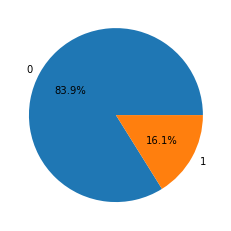

In [24]:
labels = ['0', '1']
plt.pie(data.Attrition.value_counts(), labels=labels, autopct='%.1f%%')
plt.show()

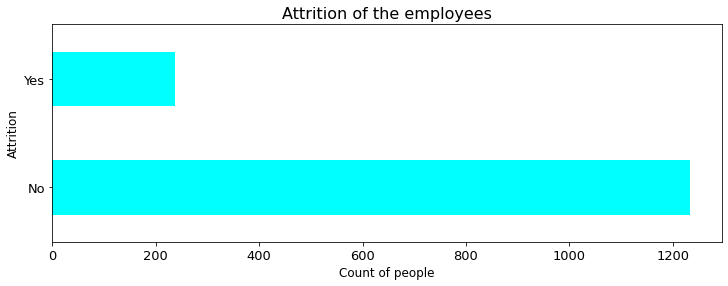

In [25]:
#Attrition of employees

data['Attrition'].value_counts().plot(kind='barh', figsize=(12,4), color="cyan", fontsize=13)

plt.xlabel("Count of people", fontsize=12)
plt.ylabel("Attrition", fontsize=12)
plt.title("Attrition of the employees", fontsize=16)
plt.show()

In [87]:
#Age
t = pd.crosstab(data.Age,columns = data.Attrition)
t

Attrition,0,1
Age,,
18,4,4
19,3,6
20,5,6
21,7,6
22,11,5
23,10,4
24,19,7
25,20,6
26,27,12


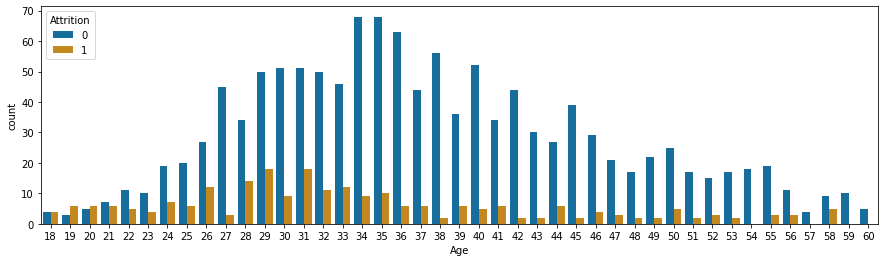

In [88]:
# Bar Graph of Age by Attrition
plt.subplots (figsize=(15,4))
sns.countplot (x='Age',  hue='Attrition', data= data, palette = 'colorblind')
plt.show()

Most of the employees, tend to fall in the age range from 25 years to 45 years. The proportion of employees who left was comparatively less among the senior level employees the reason might be job level as they were at higher position. Major Attrition occured among the mid-career level employees, age range 27 years to 42 years. Career change and career growth could be one of the possibilities.

In [89]:
#Monthly Income
data.MonthlyIncome.describe()

count     1470.000000
mean      6502.931293
std       4707.956783
min       1009.000000
25%       2911.000000
50%       4919.000000
75%       8379.000000
max      19999.000000
Name: MonthlyIncome, dtype: float64

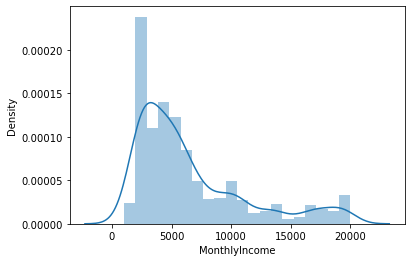

In [29]:
sns.distplot(data['MonthlyIncome']) 
plt.show()

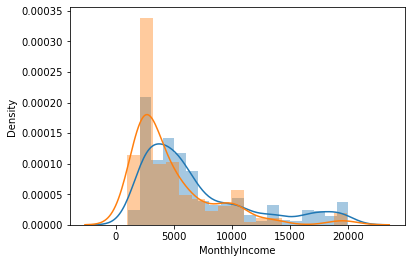

In [30]:
p_attr = data.loc[data['Attrition'] == "Yes"]
n_attr = data.loc[data['Attrition'] == "No"]
sns.distplot(n_attr['MonthlyIncome'], label='Negative attrition')
sns.distplot(p_attr['MonthlyIncome'], label='positive attrition')
plt.show()    

There is high attrition rate among employees having relatively lower salary range ( less than 5000 ).

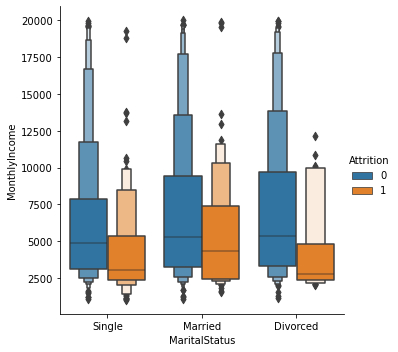

In [90]:
#Box plot of martial status,monthly income by attrition
sns.catplot(x="MaritalStatus",y="MonthlyIncome",hue="Attrition" ,kind="boxen",data=data)   
plt.show()

Monthly income and attrition using Marital Status category show more attrition in married matial status. Major concern might be career choice of both, relocation or other.

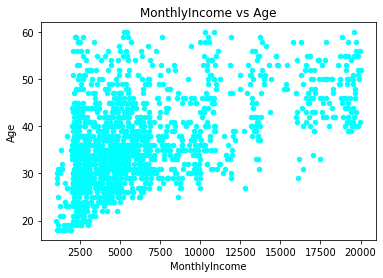

In [91]:
#Monthly Income by Age
data.plot.scatter(x = 'MonthlyIncome', y = 'Age',
                  color = 'cyan', title = 'MonthlyIncome vs Age')
plt.show()

In [92]:
#Job Satisfaction
data["JobSatisfaction"].value_counts()

4    459
3    442
1    289
2    280
Name: JobSatisfaction, dtype: int64

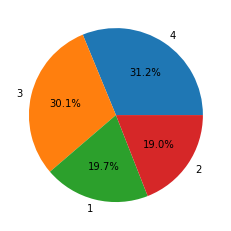

In [34]:
labels = ['4', '3','1','2']
plt.pie(data.JobSatisfaction.value_counts(), labels=labels, autopct='%.1f%%')
plt.show()

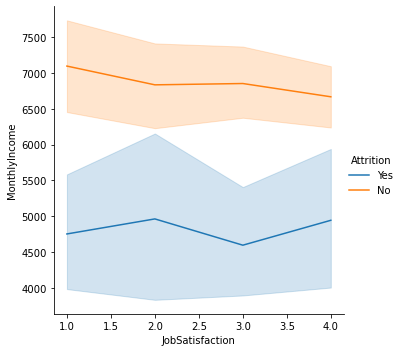

In [35]:
sns.relplot(x="JobSatisfaction",y="MonthlyIncome",hue="Attrition",kind="line",data=data)
plt.show()

There are 4 categories in job satisfaction 1,2,3 and 4 Highest rating is with ‘Job Satisfaction 4’ with a count of 459. Least rating is with ‘Job Satisfaction 1’ with a count of 280.

In [93]:
#Department
data["Department"].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

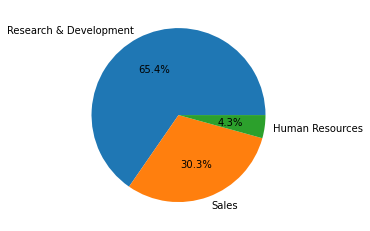

In [37]:
labels = ['Research & Development', 'Sales', 'Human Resources']
plt.pie(data.Department.value_counts(), labels=labels, autopct='%.1f%%')
plt.show()

In [38]:
matrix = pd.crosstab(data.Department,columns = data.Attrition)
matrix

Attrition,No,Yes
Department,,
Human Resources,51,12
Research & Development,828,133
Sales,354,92


In [39]:
data = data.replace("Yes", 1)
data = data.replace("No", 0)

In [40]:
data.groupby('Department')['Attrition'].mean()

Department
Human Resources           0.190476
Research & Development    0.138398
Sales                     0.206278
Name: Attrition, dtype: float64

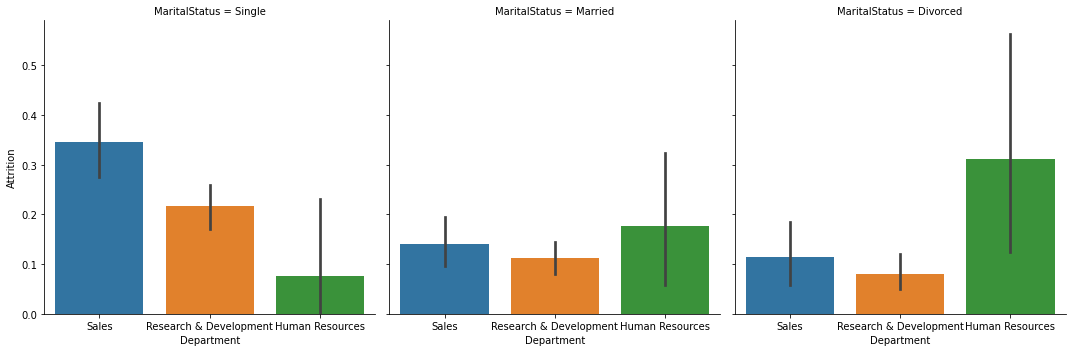

In [41]:
sns.catplot(x="Department",y="Attrition" ,col="MaritalStatus",kind="bar",data=data)   
plt.show()

Employees in R&D department seem to have less attrition rate among other department employees. Marital status, sales singles seem to have almost twice the attrition rate of sales married employees and same with Human Resourse married and divoreced case.

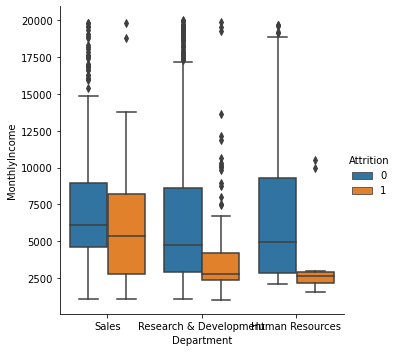

In [42]:
sns.catplot(x="Department",y="MonthlyIncome" ,hue="Attrition",kind="box",data=data)   
plt.show()

In compared to monthly income, less income employee from human resorce has more Attrition.

In [94]:
#Education Field
data["EducationField"].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

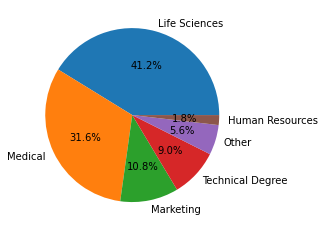

In [45]:
labels = ['Life Sciences', 'Medical', 'Marketing','Technical Degree','Other','Human Resources']
plt.pie(data.EducationField.value_counts(), labels=labels, autopct='%.1f%%')
plt.show()

In [46]:
t4 = pd.crosstab(data.EducationField,columns = data.Attrition)
t4

Attrition,0,1
EducationField,,
Human Resources,20,7
Life Sciences,517,89
Marketing,124,35
Medical,401,63
Other,71,11
Technical Degree,100,32


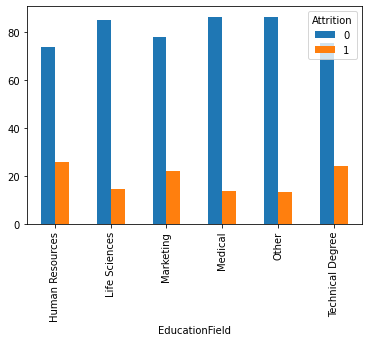

In [47]:
tab=pd.crosstab(data["EducationField"],data["Attrition"],normalize='index')*100
tab.plot(kind="bar")
plt.show()

Here,we can see that HR,Marketing and Technical education result in higher attrition.

In [48]:
#Environment Satisfaction

data["EnvironmentSatisfaction"].value_counts()

3    453
4    446
2    287
1    284
Name: EnvironmentSatisfaction, dtype: int64

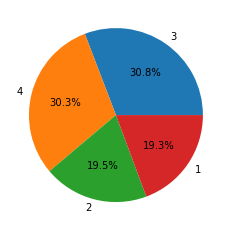

In [49]:
labels = ['3', '4', '2','1']
plt.pie(data.EnvironmentSatisfaction.value_counts(), labels=labels, autopct='%.1f%%')
plt.show()

In [50]:
t5 = pd.crosstab(data.EnvironmentSatisfaction,columns = data.Attrition)
t5

Attrition,0,1
EnvironmentSatisfaction,,
1,212,72
2,244,43
3,391,62
4,386,60


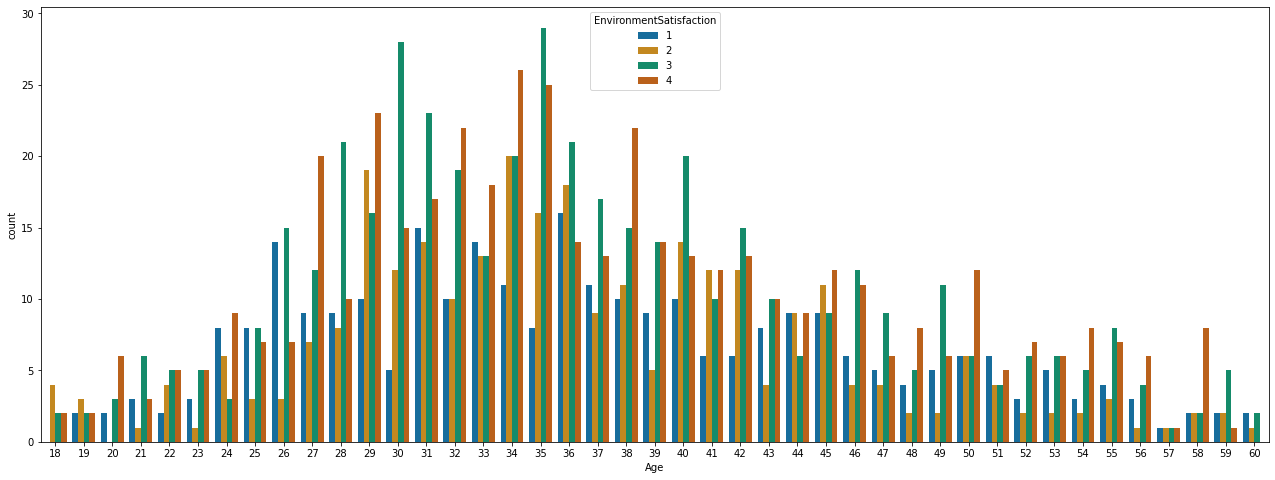

In [51]:
plt.subplots (figsize=(22,8))
sns.countplot (x='Age',  hue='EnvironmentSatisfaction', data= data, palette = 'colorblind')
plt.show()

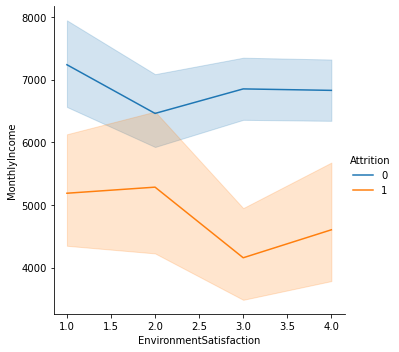

In [52]:
sns.relplot(x="EnvironmentSatisfaction",y="MonthlyIncome",hue="Attrition",kind="line",data=data)
plt.show()

Overall we can see that average environmental satisfaction is 3 or 4 which is good sign.

In [53]:
#Work Life Balance

data["WorkLifeBalance"].value_counts()

3    893
2    344
4    153
1     80
Name: WorkLifeBalance, dtype: int64

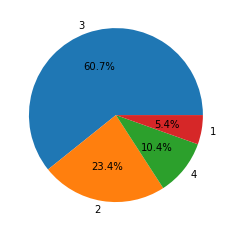

In [54]:
labels = ['3', '2','4','1']
plt.pie(data.WorkLifeBalance.value_counts(), labels=labels,autopct='%.1f%%')
plt.show()

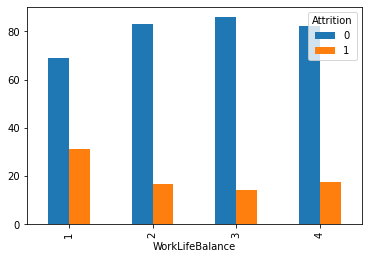

In [55]:
tab = pd.crosstab(data["WorkLifeBalance"],data["Attrition"],normalize='index')*100
tab.plot(kind='bar')
plt.show()

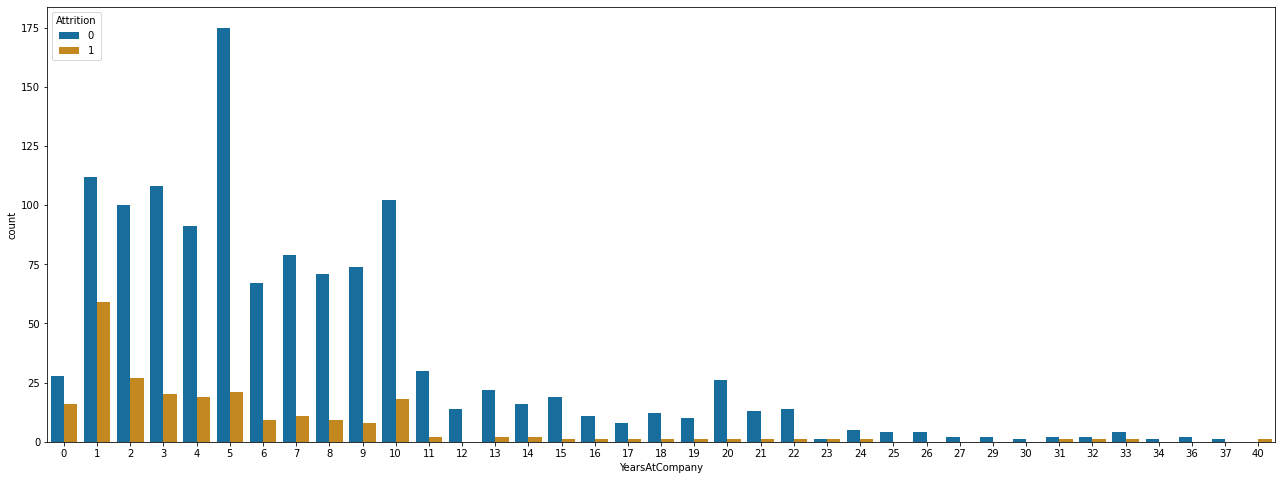

In [56]:
#Year at company

plt.subplots (figsize=(22,8))
sns.countplot (x='YearsAtCompany',  hue='Attrition', data= data, palette = 'colorblind')
plt.show()

People having less than 5 to 10 years of experience at company are likely to leave.

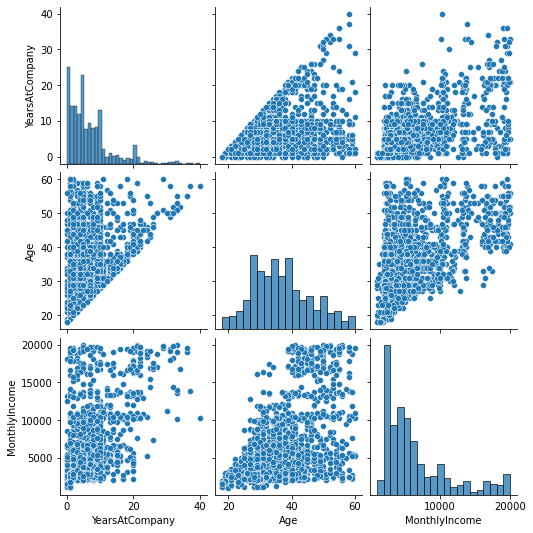

In [57]:
sns.pairplot(data, vars=["YearsAtCompany","Age","MonthlyIncome"])
plt.show()

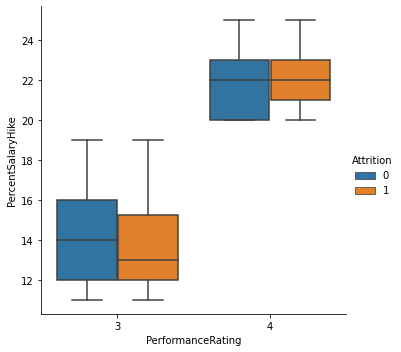

In [58]:
#Performance Rating and Percent Salary Hike by Attrition

sns.catplot(x="PerformanceRating",y="PercentSalaryHike" ,hue="Attrition",kind="box",data=data)   
plt.show()

Here, salary hike is according to the performance rating. The employee with 3 performance rating have less salary hike resulting in attrition.

In [63]:
data1 = pd.read_csv("C:/Users/Lenovo/Desktop/Technocolabs/Projects/-HR-Employee-Attrition - Copy.csv")
data1.head()

,Age,Attrition,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1,2,2,0,94,3,2,4,...,1,80,0,8,0,1,6,4,0,5
1,49,0,8,1,3,1,61,2,2,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,2,4,1,92,2,1,3,...,2,80,0,7,3,3,0,0,0,0
3,33,0,3,4,4,0,56,3,1,3,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,1,1,1,40,3,1,2,...,4,80,1,6,3,3,2,2,2,2


In [64]:
#Correlation

data1 = pd.get_dummies(data1, columns=['StandardHours'], drop_first=True)

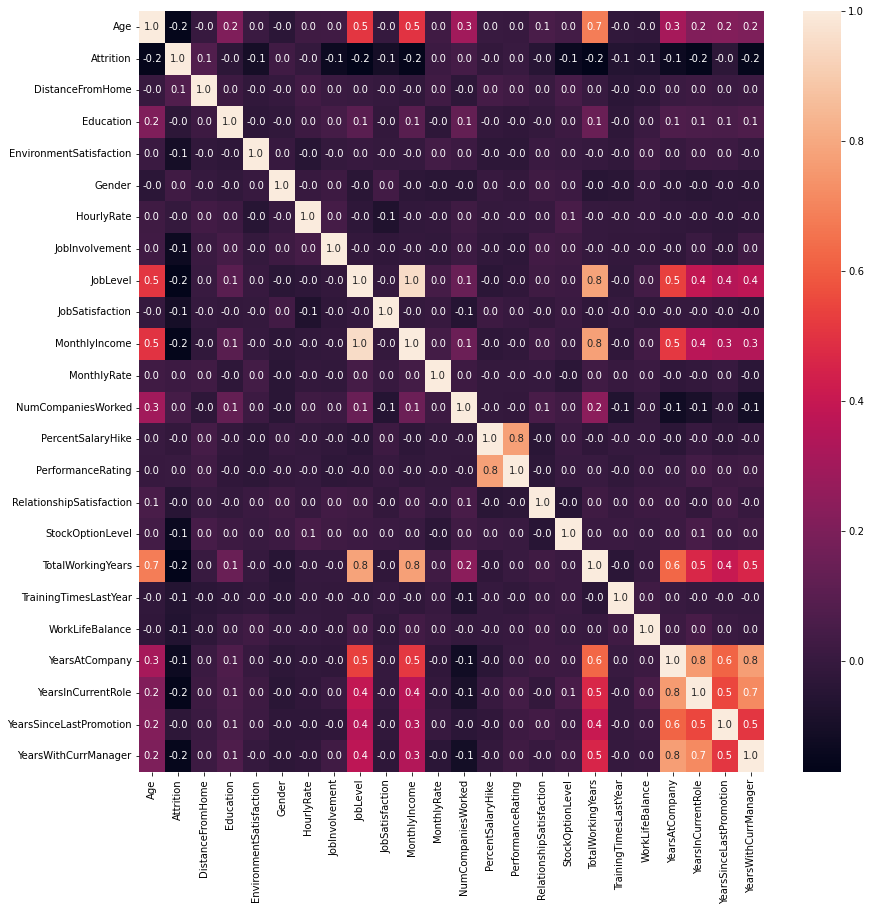

In [65]:
#Correlation

f,ax = plt.subplots(figsize=(14,14))
sns.heatmap(data1.corr(), annot = True, fmt = ".1f", ax=ax)
plt.show()

Variables such as TotalWorkingYears, YearsAtCompany, YearsInCurrentRole are highly corelated to each other. Also 'Work Life Balance', 'Job Satisfaction' and 'Environment Satisfaction' do not have strong correlation with other features.

# Predicting Attrition using Machine Learning Models

## 1. Random Forest

In [66]:
#Split the data

X = data1.drop('Attrition', axis=1)
y = data1['Attrition']



In [67]:
#Split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
#Build Random Forest Classifier model

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [69]:
# Predict on test set

y_pred = rf_model.predict(X_test)

In [85]:
# Model evaluation

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy Score: 0.8877551020408163
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       255
           1       0.80      0.21      0.33        39

    accuracy                           0.89       294
   macro avg       0.85      0.60      0.63       294
weighted avg       0.88      0.89      0.86       294



In [86]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 2. Logistic Regression
## 3. Decision Trees
## 4. Naive Bayes
## 5. Gradient Boosting
## 6. K-Nearest Neighbors

In [72]:
#Define model

models = {
    'Logistic Regression': LogisticRegression(C = 0.1, random_state = 42, solver = 'liblinear'),
    'Decision Tree': DecisionTreeClassifier(),
    'Naive Bayes': GaussianNB(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'KNN': KNeighborsClassifier()
}

In [73]:
#Train and evaluate each model

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.2f}")
    print(classification_report(y_test, y_pred))

Model: Logistic Regression
Accuracy: 0.88
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       255
           1       0.73      0.21      0.32        39

    accuracy                           0.88       294
   macro avg       0.81      0.60      0.63       294
weighted avg       0.87      0.88      0.85       294

Model: Decision Tree
Accuracy: 0.81
              precision    recall  f1-score   support

           0       0.90      0.87      0.89       255
           1       0.32      0.38      0.35        39

    accuracy                           0.81       294
   macro avg       0.61      0.63      0.62       294
weighted avg       0.83      0.81      0.82       294

Model: Naive Bayes
Accuracy: 0.79
              precision    recall  f1-score   support

           0       0.92      0.84      0.87       255
           1       0.32      0.51      0.40        39

    accuracy                           0.79       294
   macro avg    

In [74]:
#Confusion matrix for each model
#True Positives (TP): Number of employees correctly predicted to leave the company.
#True Negatives (TN): Number of employees correctly predicted to stay in the company.
#False Positives (FP): Number of employees incorrectly predicted to leave the company (Type I error).
#False Negatives (FN): Number of employees incorrectly predicted to stay in the company (Type II error).

def plot_confusion_matrix(model, X_test, y_test):
    plt.figure(figsize=(8, 6))
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

Visualizing Logistic Regression


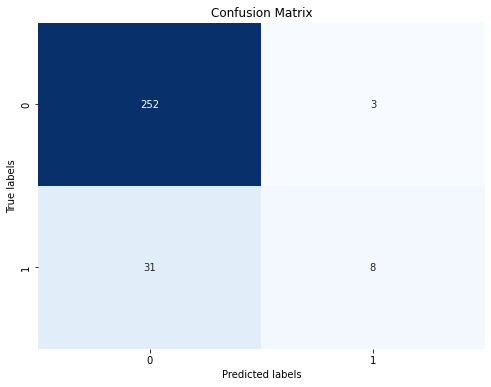

Visualizing Decision Tree


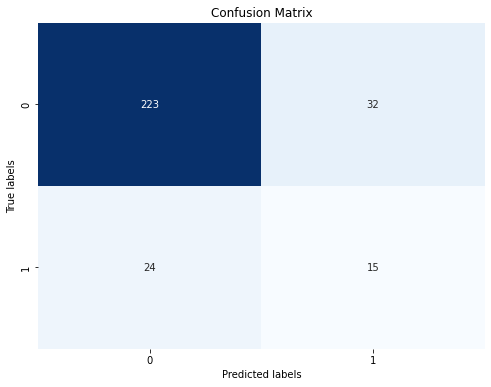

Visualizing Naive Bayes


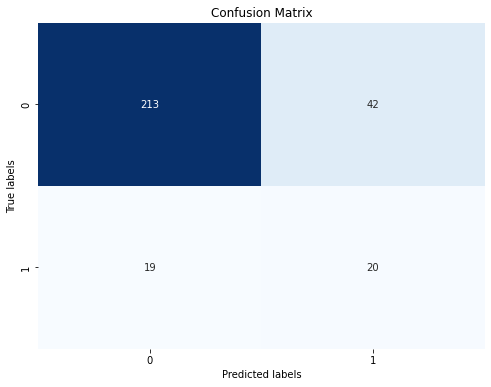

Visualizing Gradient Boosting


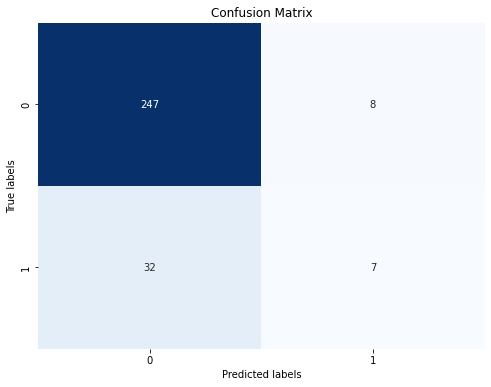

Visualizing KNN


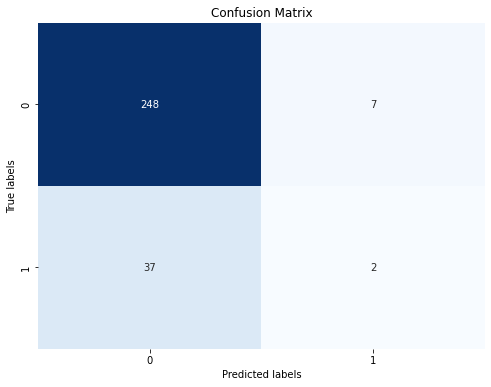

In [75]:
#Visual of confusion matrix for each model

for name, model in models.items():
    print(f"Visualizing {name}")
    plot_confusion_matrix(model, X_test_scaled, y_test)

In [95]:
#Accuracy for each model
model_names = list(models.keys())
accuracies = []

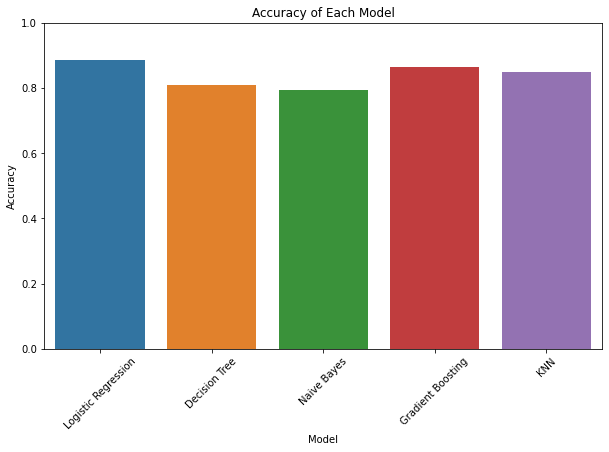

In [77]:
#Visualizing accuracy for each model to compare

for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=accuracies)
plt.title('Accuracy of Each Model')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()

Logistic regression is showing the highest accuracy compared to all the other models. The accuracy score indicates the proportion of correct predictions made by the model.

# Hyperparameter Tuning & Cross Validation

In [78]:
#Parameter grid to adjust
param_grid = {
    'C': np.logspace(-4, 4, 20),  # Regularization parameter
    'penalty': ['l1', 'l2'],  # Penalty type
    'solver': ['liblinear']  # Algorithm to use in the optimization problem
}

In [79]:
grid_search = GridSearchCV(LogisticRegression(), param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

In [80]:
#Perform hyperparameter tuning and cross-validation
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             scoring='accuracy', verbose=1)

In [81]:
#The best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'C': 0.0006951927961775605, 'penalty': 'l2', 'solver': 'liblinear'}


In [82]:
#Best model
best_model = grid_search.best_estimator_

In [83]:
#Using the best model to make predictions
y_pred = best_model.predict(X_test_scaled)

In [84]:
#Calculate accuracy of best model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8877551020408163


The accuracy of the best logistic regression model on the test data was calculated to be 0.88, suggesting that it performed well in predicting employee attrition based on the given features.